# Model Training 

In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns



## Load the Processed Dataset

In [12]:
train = pd.read_csv('Preprossed_data.csv',parse_dates=['date'],low_memory=False)

## Baseline Model (Naïve Forecasting)

In [13]:
train['naive_forecast'] = train.groupby(['store_nbr','family'])['sales'].shift(1)

## Prepare Training Data

In [14]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale',
       'locale_name', 'description', 'transferred', 'day', 'week', 'month',
       'year', 'day_of_week', 'is_holiday', 'is_gov_payday', 'promotion',
       'earthquake_impact', 'sales_mean7', 'sales_std7', 'sales_lag7',
       'sales_lag30', 'sales_avg_store', 'naive_forecast'],
      dtype='object')

In [17]:
features = ['day','week','month','year','is_holiday','is_gov_payday','promotion','earthquake_impact','sales_mean7','sales_std7','sales_lag7','sales_lag30','sales_avg_store']

In [18]:
X = train[features].dropna()
y = train.loc[X.index,'sales']

## Split data into Training and Testing data

In [19]:
train_size = int(len(X) * 0.8)
X_train,X_val = X[:train_size], X[train_size:]
y_train,y_val = y[:train_size], y[train_size:]

In [20]:
y_train_sample = y_train.iloc[-10000:]


## ARIMA (AutoRegressive Integrated Moving Average) - A traditional time series model

In [22]:
arima_model = ARIMA(y_train, order=(2,1,0))
arima_model_fit = arima_model.fit(low_memory = True)
arima_preda = arima_model_fit.forecast(steps = len(y_val))

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## Random Forest Regressor

In [36]:
rf_model = RandomForestRegressor(n_estimators = 50, random_state = 42)

rf_model.fit(X_train,y_train)
rf_preds = rf_model.predict(X_val)

KeyboardInterrupt: 

In [ ]:
rf_model.fit(X_sample,y_sample)

In [ ]:
rf_model.predict(X_sample)

## XGBoost or LightGBM - Gradient boosting

In [39]:
xgb_model = XGBRegressor(n_estimators = 50,learning_rate = 0.1)
xgb_model.fit(X_train,y_train)
xgb_preds = xgb_model.predict(X_val)

# Model Evaluation

In [43]:
def evaluate_model(y_true,y_pred,model_name):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    mape = mean_absolute_percentage_error(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)
    print(f"{model_name}-RMSE:{rmse:.2%},MAPE:{mape:.2%},R2:{r2:.2%}")
    
    print("Model Evaluation:")
    if 'arima_pread' in locals():
        evaluate_model(y_val,arima_preda,"ARIMA")
    else:
        print("ARIMA Predictions are not found")

evaluate_model(y_val,arima_preda,"ARIMA")
# evalute_model(y_val,rf_preds,"Random Forest")
evaluate_model(y_val,xgb_preds,"XGB")

ARIMA-RMSE:179446.13%,MAPE:51183142797402431488.00%,R2:-1.57%
Model Evaluation:
ARIMA Predictions are not found
XGB-RMSE:115520.89%,MAPE:24543579127090573312.00%,R2:57.91%
Model Evaluation:
ARIMA Predictions are not found


## Visulization

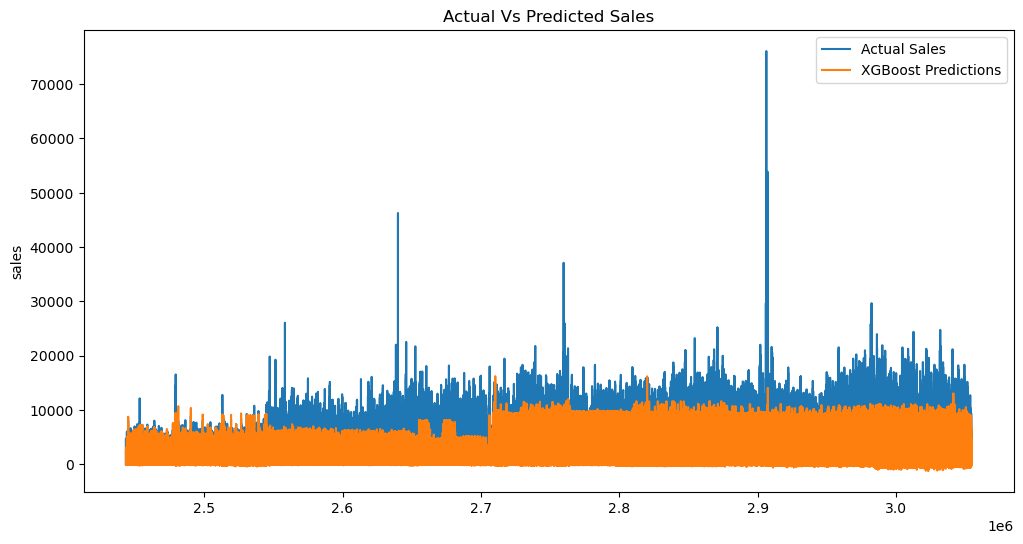

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(x=y_val.index, y=y_val, label = "Actual Sales")
sns.lineplot(x=y_val.index, y=xgb_preds,label = "XGBoost Predictions")
plt.legend()
plt.title("Actual Vs Predicted Sales")
plt.show()

## Model Training is Completed